# Supervised learning HANDS ON!
 
Here an example on how to generate data in classes, and work on the data directly via their classes. 

#### Let's get back the class from the previous example

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y]
        
        return self.data

    def plot_me(self, i=None):
        plt.scatter(self.data[0], self.data[1])
        if i is not None:
            plt.savefig(f'Fig_{i}.png')

    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self.data
        
    def __str__(self):
        return f'Class {self.description} for 2D data' 

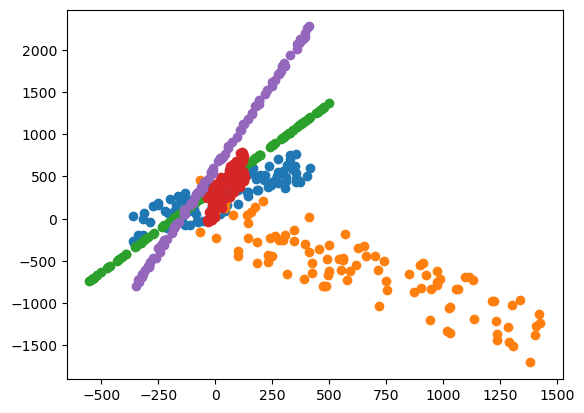

In [8]:
## And let's plot it for a random dataset
data_settings = [{'n_points':  100, 'x_range': [-366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [ -66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [-566,  533], 'y_range': [ 366,  366], 'true_slope':  2, 'true_intercept':  0},
                 {'n_points':  100, 'x_range': [ -36,  133], 'y_range': [   6,  433], 'true_slope':  3, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [-366,  433], 'y_range': [ 566,  633], 'true_slope':  4, 'true_intercept': 10}]
 
my_classes = []
for i in range(len(data_settings)):
    my_classes.append(Data_generator(data_settings=data_settings[i]))
    
for i, i_class in enumerate(my_classes): 
    i_class.generate_data()
    i_class.plot_me(i) 

### Linear Regression

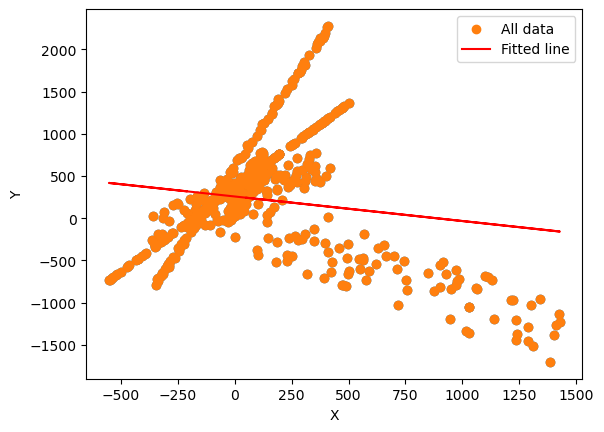

In [9]:
from sklearn.linear_model import LinearRegression

my_main_class = my_classes[0]
for i in range(1, len(my_classes)):    
    my_main_class + my_classes[i] 
my_main_class.plot_me(0)

x = my_main_class.data[0]
y = my_main_class.data[1]
X = x.reshape(-1, 1)  # sklearn expects a 2D array for the features

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(x, y, label='All data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### Neural Network

%### !pip install tensorflow if you need to install the Keras library

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1

# Generate synthetic linear data
x = my_main_class.data[0].reshape(-1, 1) 
y = my_main_class.data[1].reshape(-1, 1) 

# Define the neural network model for linear regression
model = Sequential([
    Dense(64, input_dim=1, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer without activation for linear regression
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=200, verbose=1)

# Use the model for prediction
y_pred_NN = model.predict(x)
# print("Predictions:\n", y_pred) 

2024-04-29 10:35:31.629616: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 10:35:31.692275: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 10:35:32.087910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 10:35:33.847547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/enrico/Programs/miniconda3/envs/python_3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer 

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 526218.1250   
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 520928.2812 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 503008.1875 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 534679.8125 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 508943.8438 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 489011.1562 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 470450.8750 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 498444.0000 
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 430109.2812 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 553867.5625 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 524740.1875 
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 532182.3750 
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 545785.5625 
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

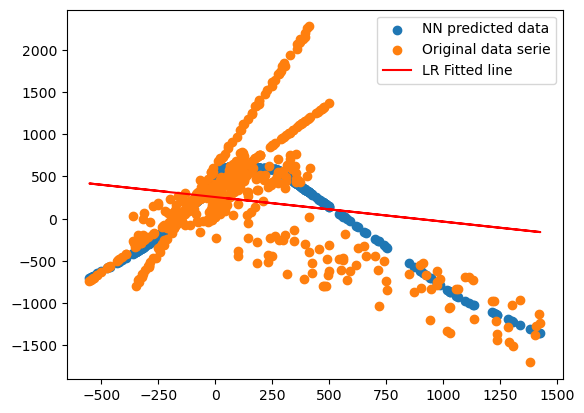

In [11]:
 
plt.scatter(x, y_pred_NN, label=f'NN predicted data')

x = my_main_class.data[0]
y = my_main_class.data[1]
X = x.reshape(-1, 1)  # sklearn expects a 2D array for the features

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(x, y, label='Original data serie')
plt.plot(x, y_pred, color='red', label='LR Fitted line')
plt.legend()

###

/home/enrico/Programs/miniconda3/envs/python_3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


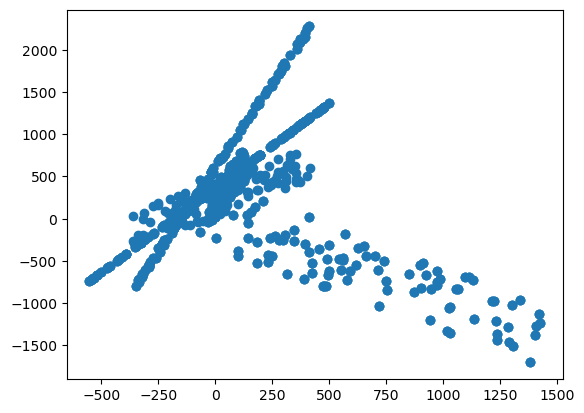

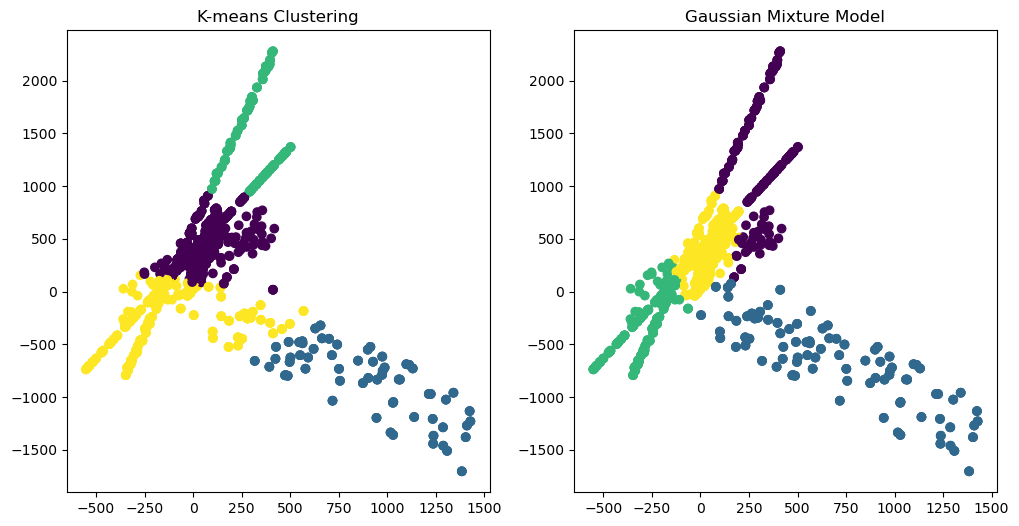

In [13]:
# !pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

my_main_class = my_classes[0]
for i in range(1, len(my_classes)):    
    my_main_class + my_classes[i] 
my_main_class.plot_me()

data = np.array(my_main_class.data).T

# Apply K-means clustering
kmeans = KMeans(n_clusters=4) 
kmeans.fit(data)
labels_kmeans = kmeans.labels_

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(data)
labels_gmm = gmm.predict(data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.title('K-means Clustering')
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_gmm)
plt.title('Gaussian Mixture Model')
plt.show()